In [7]:
import scipy as sp
from scipy import sparse
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


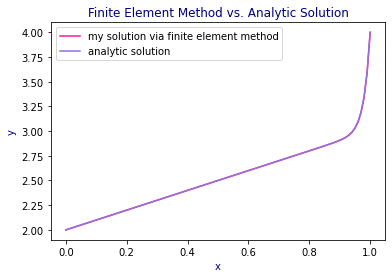

In [8]:
#want to solve the equation AK = Phi for K here

def solve_me(N, h, eps, alph, beta):
    #construct the A matrix:
    A = np.zeros((N+1, N+1))   #initialize A as matrix of 0s
    A[0][0], A[-1][-1] = 1, 1  #very 1st,very last values of A matrix are both 1
    
    #define the rest of A matrix:
    #for loop below goes thru every value in diagonal
    for i in range(1, N):    #do range of 1 to N bc dont want go through very 1st, very last value
        A[i][i-1] = (eps/h)+(1/2)    #1st entry in each row corresp. to if j=i+1
        A[i][i] = (-eps/h)+(-eps/h)  #the 2nd entry in each row corresp. to if j=i
        A[i][i+1] = (eps/h)-(1/2)    #the 3rd entry in each row corresp. to if j=i-1
        
    #define the phi vector:
    phi = np.ones(N+1).T*(-h)  #h is the same for all j in this question so adding them, dividing by 2 is same
                               #as multiplying by just h here
    phi[0], phi[-1] = alph,beta
    
    #now we solve for K:
    K_ans = np.linalg.solve(A, phi)  #this will give us our K vector answer, yaHOO!
    
    return K_ans

#define all variables need:
alph = 2
beta = 4
eps = 0.02
N = 100
x,h = np.linspace(0,1,N+1,retstep = True)  #x and h both range over 0 to 1
y = lambda x: alph + x + (beta-alph-1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)  #the analytic solution

my_answer = solve_me(N, h, eps, alph, beta)

#now compare the solution w/ the analytic solution by plotting both:
plt.plot(x, my_answer, label = "my solution via finite element method", color = "deeppink")
plt.plot(x, y(x), label = "analytic solution", color = "mediumpurple")
plt.title("Finite Element Method vs. Analytic Solution", color = "navy")
plt.xlabel("x", color = "navy")
plt.ylabel("y", color = "navy")

plt.legend(loc = "best")
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

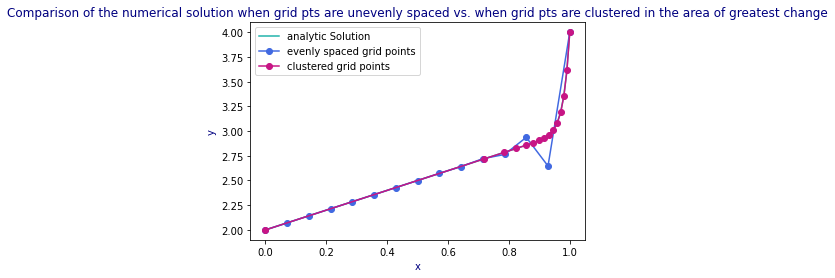

In [9]:
#define the same variables:
N = 100   #N that want when define all of the stuff below
x, h = np.linspace(0,1,N+1,retstep = True)  #x and h are same as before
y = lambda x: alph + x + (beta-alph-1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)  #the analytic solution

even_grid, h = np.linspace(0,1,15,retstep =True)
even_h = np.ones(14)*h

clustered_grid = np.linspace(0,1,15)**(1./8)
clustered_h = [clustered_grid[i+1] -clustered_grid[i] for i in range(len(clustered_grid)-1)]

#define all the variables we have:
alph = 2
beta = 4
eps = 0.02
N = 14

#now write the solver function again but need to account for how h is not the same here: need a list for h
#because of how it is not evenly spaced with the cluster stuff
def solve_me_h(N, h, eps, alph, beta):
    #construct the A matrix:
    A = sp.sparse.lil_matrix((N+1, N+1))  #initialize A as being sparse
    A[0,0], A[-1,-1] = 1, 1  #very 1st,very last values of A matrix are both 1
    
    #define the rest of A matrix:
    #for loop below goes thru every value in diagonal
    for i in range(1, N):    #do range of 1 to N bc dont want go through very 1st, very last value
        A[i,i-1] = (eps/h[i-1])+(1/2)   #have to account for how h is not constant here
        A[i,i] = (-eps/h[i-1])+(-eps/h[i])
        A[i,i+1] = (eps/h[i])-(1/2)
        
    A = csr_matrix(A)
        
    #define the phi vector: this CHANGES from prob 1 bc h is not constant anymore
    phi = np.ones(N+1).T                 #initialize phi vector as all 1s
    for i in range(1, N):                #loop through and fill in the phi vector w/ l func
        phi[i] = -(h[i-1] + h[i])/2 
    phi[0], phi[-1] = alph, beta         #change the 1st, last value of phi vec
    
    #now we solve for K:
    K_ans = spsolve(A, phi)      #this will give us our K vector answer, yaHOO!

    return K_ans

#get the answer for the unevenly spaced grid pts and when grid pts are clustered in area of greatest change:
even_ans = solve_me_h(N, even_h, eps, alph, beta)
clustered_ans = solve_me_h(N, clustered_h, eps, alph, beta)

#now plot that ting:
plt.plot(x, y(x), color = 'lightseagreen', label = "analytic Solution")
plt.plot(even_grid, even_ans,'o-',color = 'royalblue',label = "evenly spaced grid points")
plt.plot(clustered_grid, clustered_ans,'o-',color = 'mediumvioletred',label = "clustered grid points")

plt.title("Comparison of the numerical solution when grid pts are unevenly spaced vs. when grid pts are clustered in the area of greatest change", color = "navy")
plt.xlabel("x", color = "navy")
plt.ylabel("y", color = "navy")

plt.legend(loc = "best")
plt.show()

# Problem 3

Solve (12.5) with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

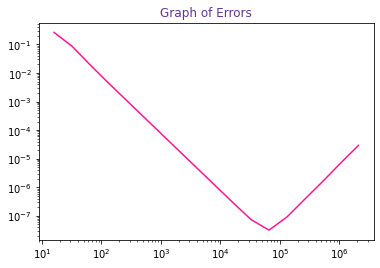

In [14]:
#define the variables:
a = 2
b = 4
eps = 0.02

errors = []  #initialize list to store the errors in

#defien the N's that want:
N_vals = [2**i for i in range(4, 22)]

for N in N_vals:
    x, h = np.linspace(0, 1, N+1, retstep = True)
    even_h = np.ones(N)*h
    y = a + x + (b-a-1)*(np.exp(x/eps)-1)/(np.exp(1/eps)-1)
    
    my_ans = solve_me_h(N, even_h, eps, a, b)
    errors.append(max(abs(y - my_ans)))
    
plt.loglog(N_vals, errors, color = "deeppink")
plt.title("Graph of Errors", color = "rebeccapurple")
plt.show()